# Exercises

In [1]:
# standard imports
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

# possible modules, may just wrangle like before
import wrangle
#import summarize


<div class="alert alert-info">
    <strong>Workflow</strong>
<br>
<br>
<strong>Throughout the exercises, you may wish to do your work in a notebook, then transfer any functions you've created to an external python script.
<br>
Keep in mind this is not always a linear process! You will probably be cycling between a notebook and an external python script frequently.
<br>
Remember to run your code often to check for correct output and/or errors.</strong>
</div>

# Zillow

### For the following, iterate through the steps you would take to create functions: Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.

### **You will have a zillow.ipynb file and a helper file for each section in the pipeline.**

## Acquire and Summarize

1. **Acquire data from the cloud database.**

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

*Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for* airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.

In [2]:
# called acquire module to bring in data.
df = wrangle.acquire_zillow()
df.drop(columns='rn', inplace=True)
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,1087254,10711855,NaN,NaN,NaN,2.00,3.00,NaN,8.00,2.00,...,"249,655.00","624,139.00","2,016.00","374,484.00","7,659.36",NaN,NaN,"60,371,132,321,007.00",-0.01,2017-07-07
1,1072280,10711877,1.00,NaN,NaN,2.00,4.00,NaN,8.00,2.00,...,"253,000.00","660,000.00","2,016.00","407,000.00","8,123.91",NaN,NaN,"60,371,132,321,007.00",0.02,2017-08-29
2,1340933,10711888,1.00,NaN,NaN,2.00,4.00,NaN,8.00,2.00,...,"257,591.00","542,923.00","2,016.00","285,332.00","6,673.24",NaN,NaN,"60,371,132,321,007.00",0.08,2017-04-04
3,1878109,10711910,NaN,NaN,NaN,2.00,3.00,NaN,8.00,2.00,...,"57,968.00","78,031.00","2,016.00","20,063.00","1,116.46",NaN,NaN,"60,371,132,321,008.00",-0.04,2017-03-17
4,2190858,10711923,NaN,NaN,NaN,2.00,4.00,NaN,8.00,2.00,...,"167,869.00","415,459.00","2,016.00","247,590.00","5,239.85",NaN,NaN,"60,371,132,321,008.00",-0.01,2017-03-24


In [3]:
# checked if query call met requirements above.

# Check for duplicates across all columns
duplicates_in_df = df.duplicated()
duplicates_in_df.value_counts()

False    77381
dtype: int64

In [4]:
df.duplicated(subset=None).sum()

0

In [5]:
df.duplicated(subset='parcelid').value_counts()

False    77381
dtype: int64

In [6]:
duplicate_parcel_ids = pd.DataFrame(df.parcelid[df.duplicated(subset='parcelid')])

In [7]:
duplicate_parcel_ids

,parcelid


In [8]:
df = df.drop_duplicates(subset='parcelid', keep='last')

In [9]:
df.duplicated(subset='parcelid').value_counts()

False    77381
dtype: int64

In [10]:
# no nulls in latitude
df.latitude.isna().sum()

0

In [11]:
# no nulls in longitude
df.longitude.isna().sum()

0

In [12]:
# checked to see if nulls are still in column as described
df.airconditioningtypeid.isna().sum()

52428

2. **Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)**

In [13]:
df.describe()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,"77,381.00","77,381.00","24,953.00",206.00,50.00,"77,381.00","77,381.00",15.00,"49,672.00","76,772.00",...,"17,560.00",172.00,"77,269.00","77,380.00","77,381.00","77,379.00","77,376.00","2,886.00","77,137.00","77,381.00"
mean,"1,495,138.90","13,007,150.51",1.81,7.39,679.72,2.30,3.05,3.93,6.53,2.32,...,1.43,1.00,"189,314.53","490,134.48","2,016.00","301,095.41","5,995.53",14.09,"60,496,733,646,265.41",0.02
std,"860,907.05","3,481,345.65",2.97,2.73,689.70,1.00,1.14,0.26,1.72,0.98,...,0.54,0.00,"230,087.42","653,443.97",0.00,"492,596.03","7,622.84",2.19,"1,535,241,981,138.57",0.17
min,349.00,"10,711,855.00",1.00,2.00,38.00,0.00,0.00,3.00,1.00,1.00,...,1.00,1.00,44.00,"1,000.00","2,016.00",161.00,19.92,3.00,"60,371,011,101,000.00",-4.66
25%,"752,070.00","11,538,305.00",1.00,7.00,273.00,2.00,2.00,4.00,6.00,2.00,...,1.00,1.00,"84,265.00","207,000.00","2,016.00","85,504.00","2,715.63",14.00,"60,373,109,005,002.00",-0.02
50%,"1,497,932.00","12,531,568.00",1.00,7.00,515.00,2.00,3.00,4.00,6.00,2.00,...,1.00,1.00,"136,499.00","358,975.50","2,016.00","203,372.00","4,450.69",15.00,"60,376,032,003,008.00",0.01
75%,"2,240,535.00","14,211,831.00",1.00,7.00,796.50,3.00,4.00,4.00,8.00,3.00,...,2.00,1.00,"218,787.00","569,001.50","2,016.00","366,796.50","6,927.79",15.00,"60,590,423,251,008.00",0.04
max,"2,982,274.00","167,689,317.00",13.00,21.00,"3,560.00",18.00,16.00,4.00,12.00,18.00,...,6.00,1.00,"11,421,790.00","49,061,236.00","2,016.00","48,952,198.00","586,639.30",99.00,"483,030,105,084,015.00",5.26


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 0 to 77380
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77381 non-null  int64  
 1   parcelid                      77381 non-null  int64  
 2   airconditioningtypeid         24953 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77381 non-null  float64
 6   bedroomcnt                    77381 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49672 non-null  float64
 9   calculatedbathnbr             76772 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6023 non-null   float64
 12  calculatedfinishedsquarefeet  77185 non-null  float64
 13  f

In [15]:
df.dtypes

id                            int64
parcelid                      int64
airconditioningtypeid       float64
architecturalstyletypeid    float64
basementsqft                float64
                             ...   
taxdelinquencyflag           object
taxdelinquencyyear          float64
censustractandblock         float64
logerror                    float64
transactiondate              object
Length: 61, dtype: object

In [16]:
df.shape

(77381, 61)

In [17]:
for col in df.columns[df.dtypes == 'object']:
    print(df[col].value_counts())
    print()
    print('--------------------')
    print()

0100    26714
122     13045
010C     8813
0101     6399
34       4922
        ...  
010L        1
105         1
020E        1
040B        1
030G        1
Name: propertycountylandusecode, Length: 75, dtype: int64

--------------------

LAR1          6747
LAR3          2437
LARS          1389
LBR1N         1222
LARD1.5       1127
              ... 
DOR105*          1
DOCP*            1
DOR3-R1500       1
DOR1O5*          1
LCR2000020       1
Name: propertyzoningdesc, Length: 1907, dtype: int64

--------------------

Y    2886
Name: taxdelinquencyflag, dtype: int64

--------------------

2017-06-30    1189
2017-04-28     911
2017-05-31     867
2017-07-28     814
2017-08-31     781
              ... 
2017-02-18       1
2017-09-25       1
2017-07-22       1
2017-04-15       1
2017-06-03       1
Name: transactiondate, Length: 265, dtype: int64

--------------------



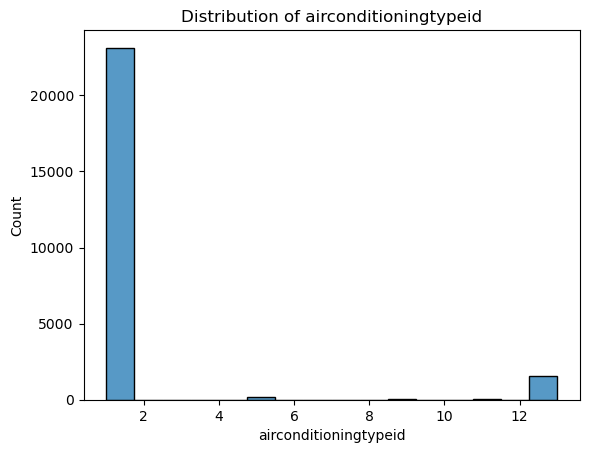

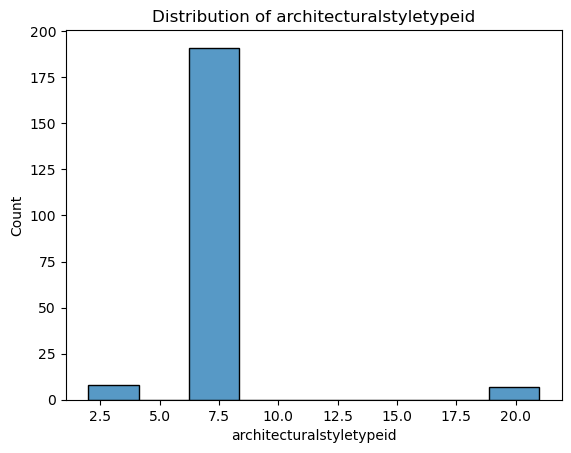

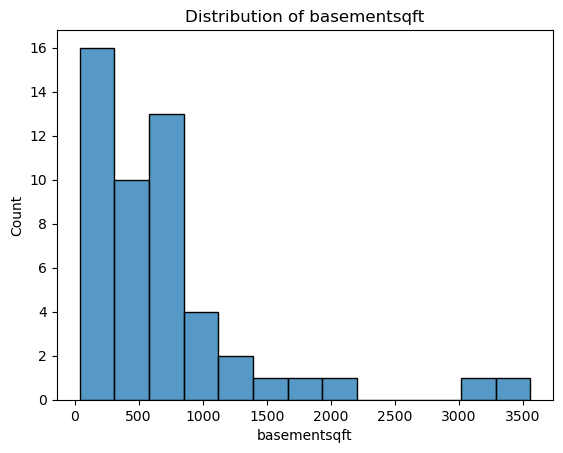

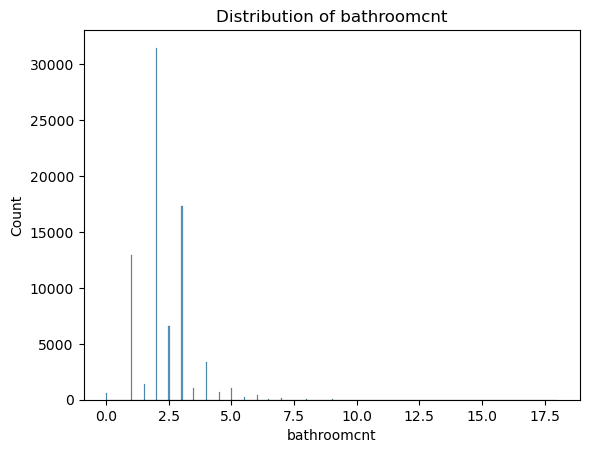

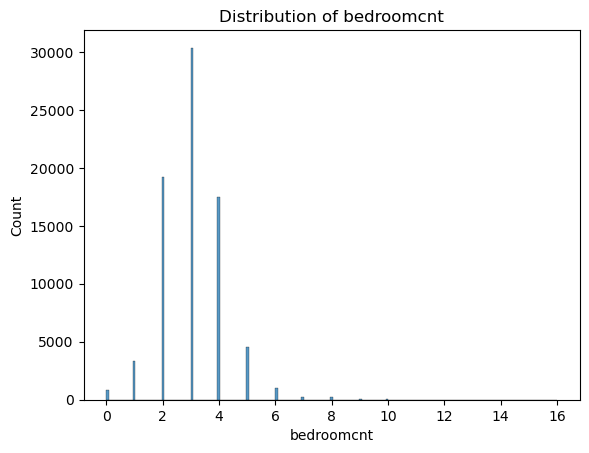

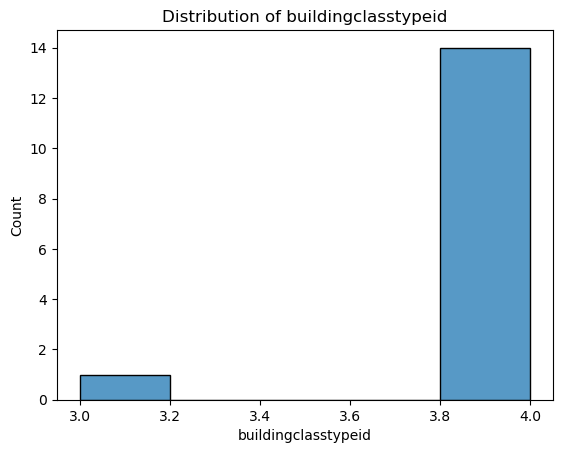

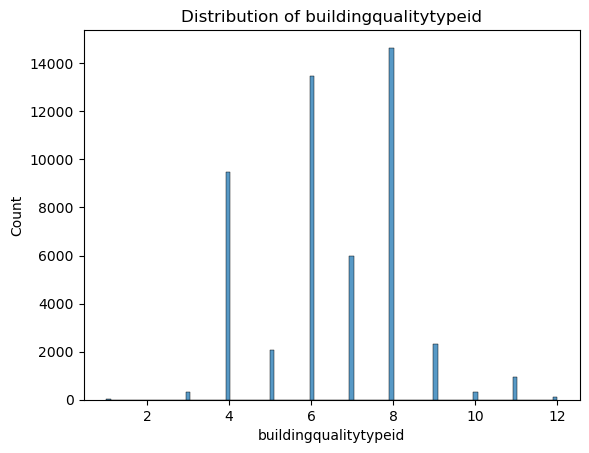

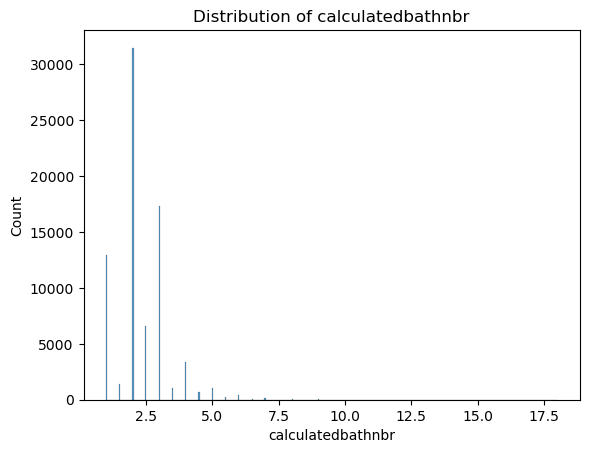

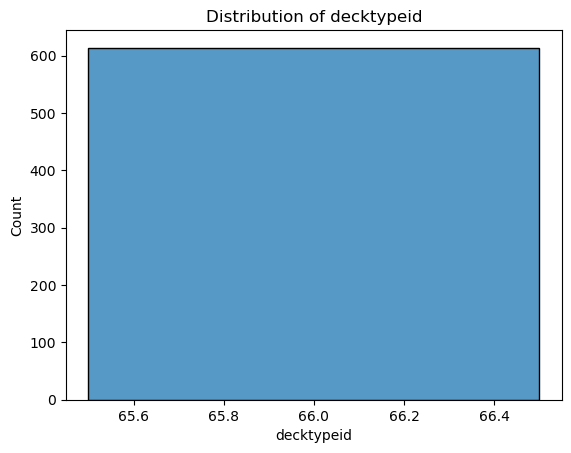

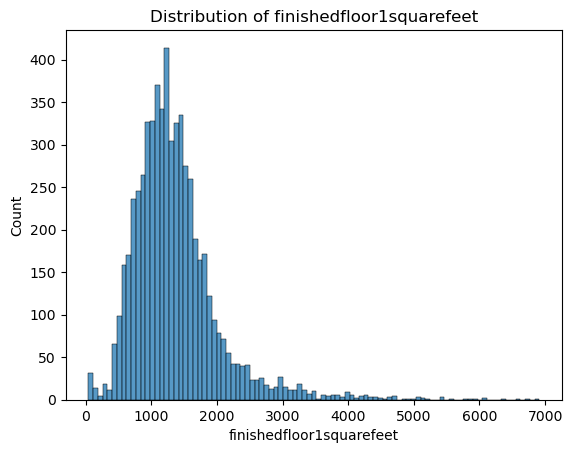

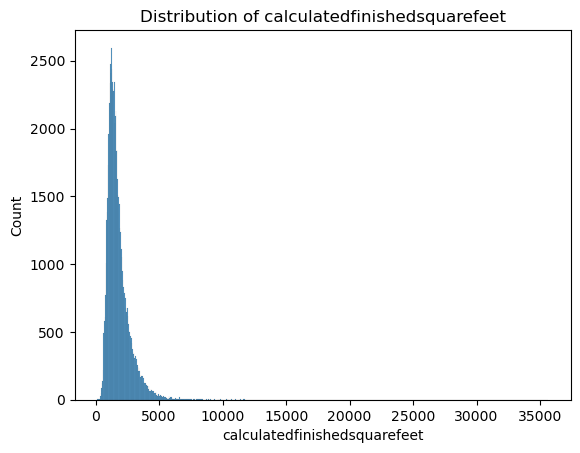

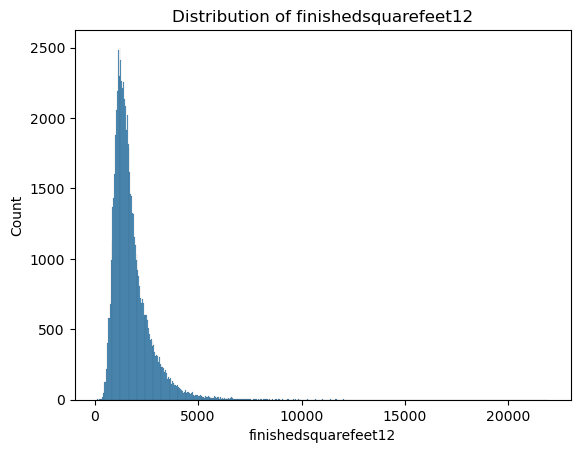

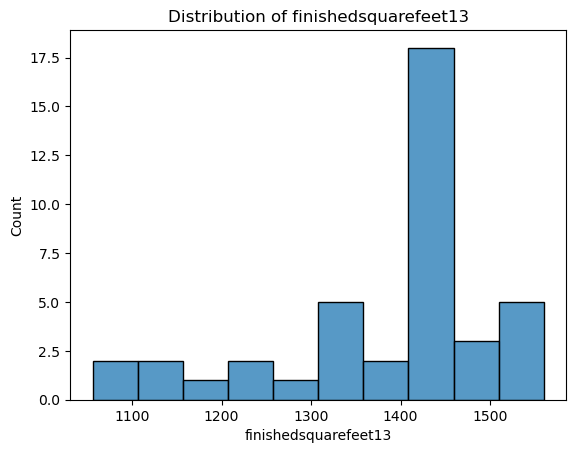

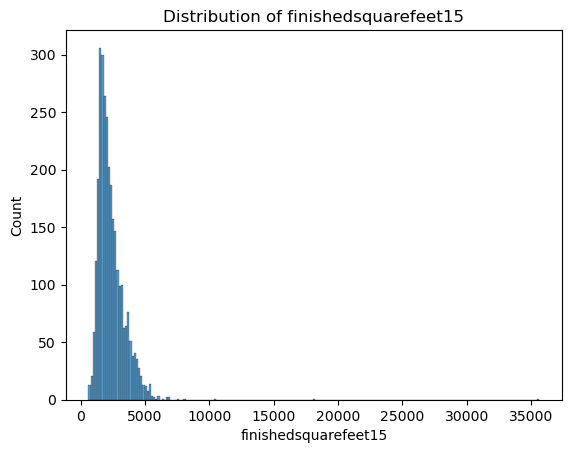

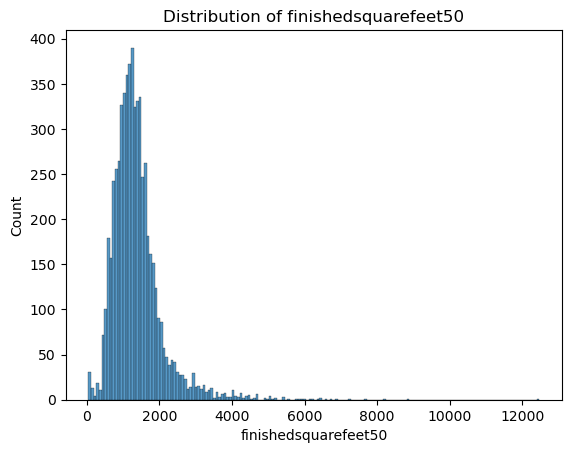

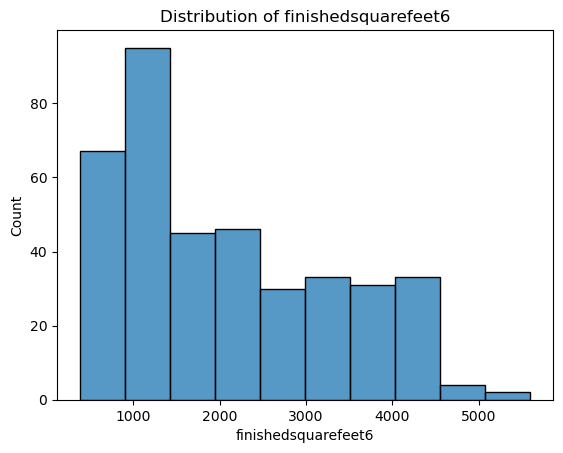

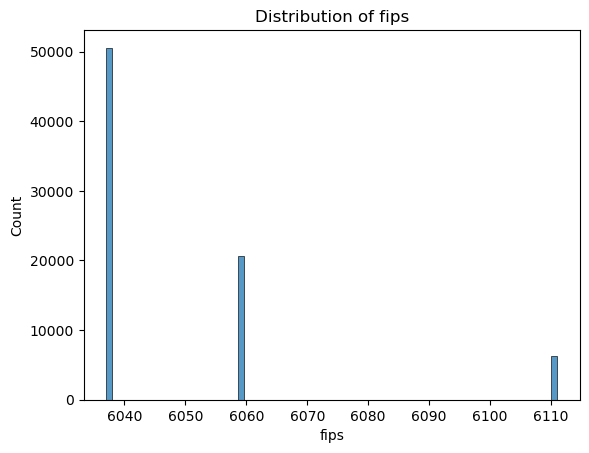

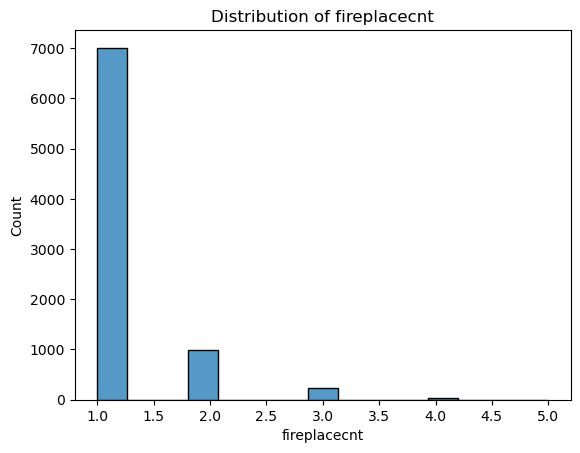

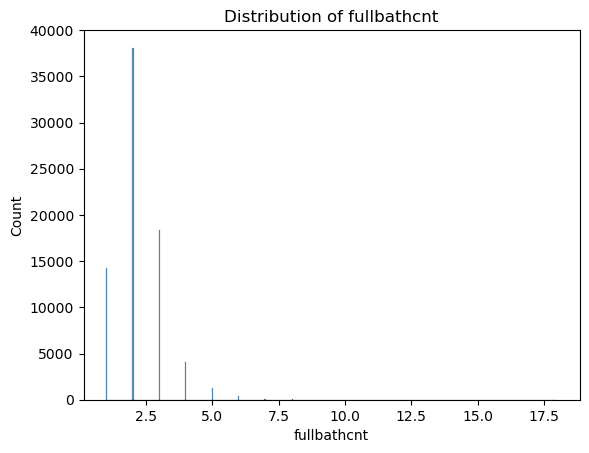

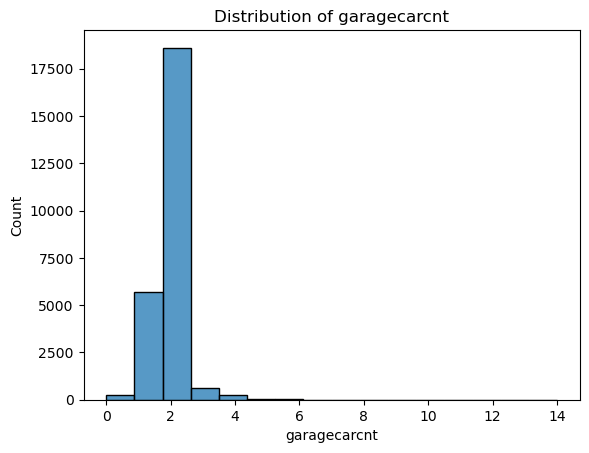

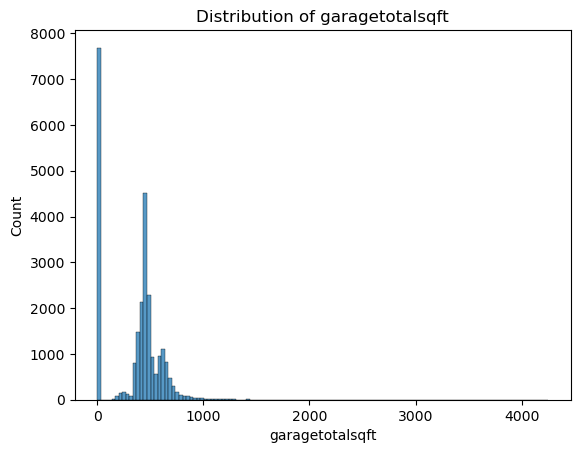

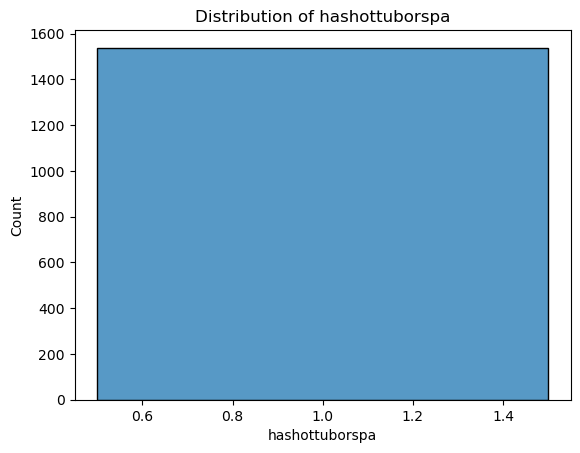

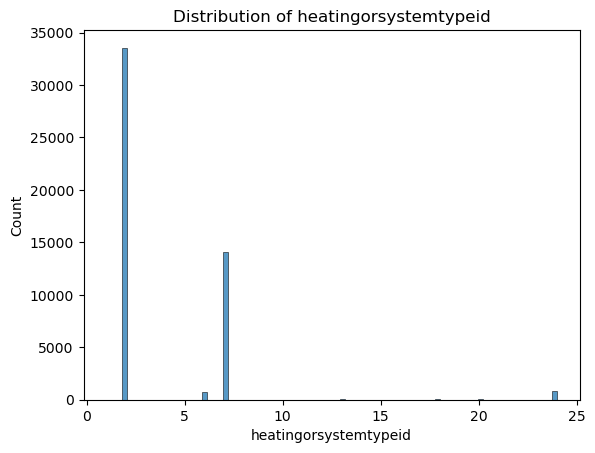

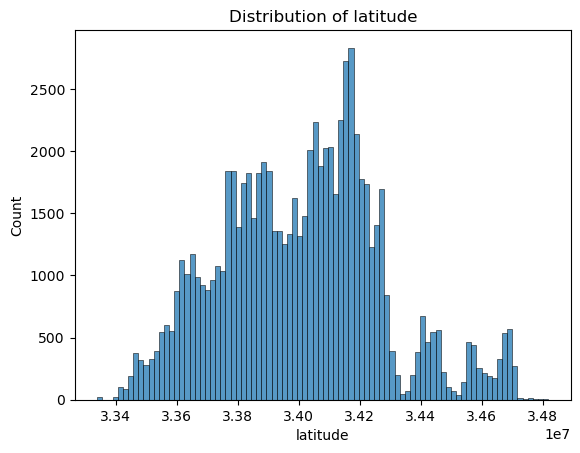

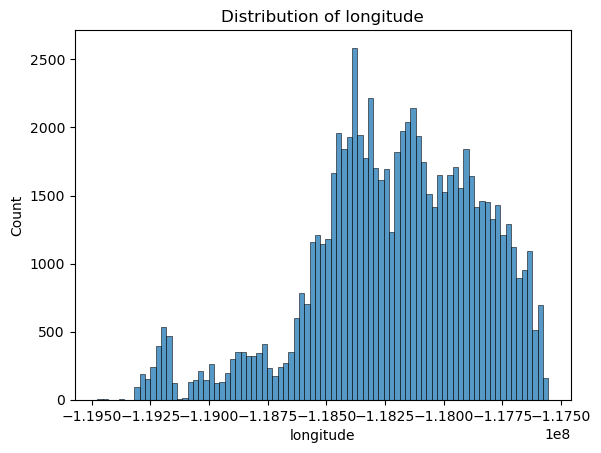

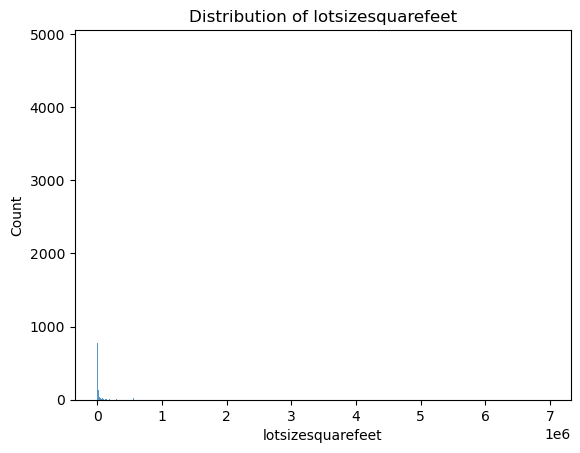

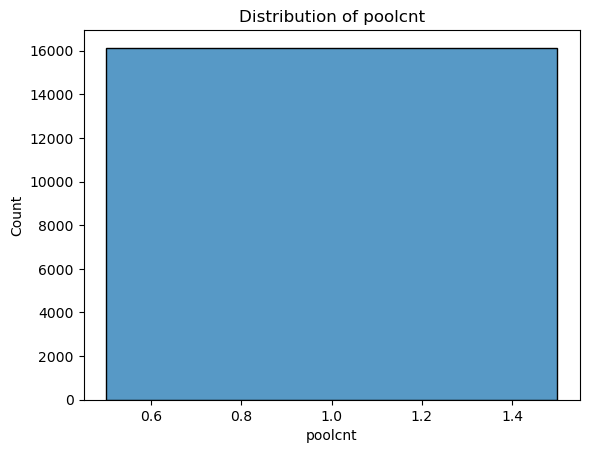

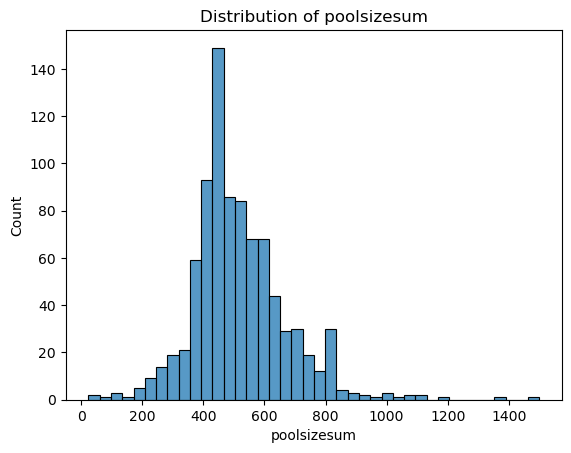

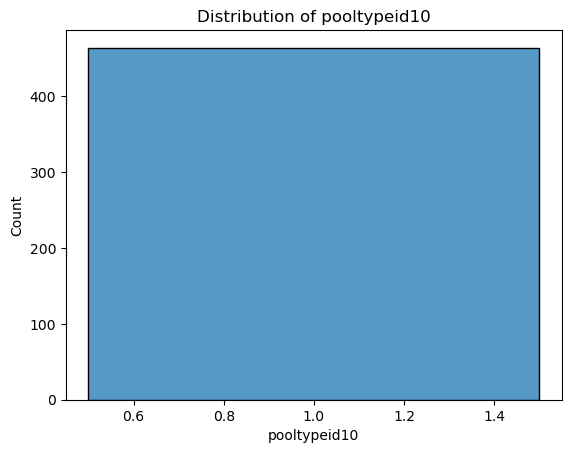

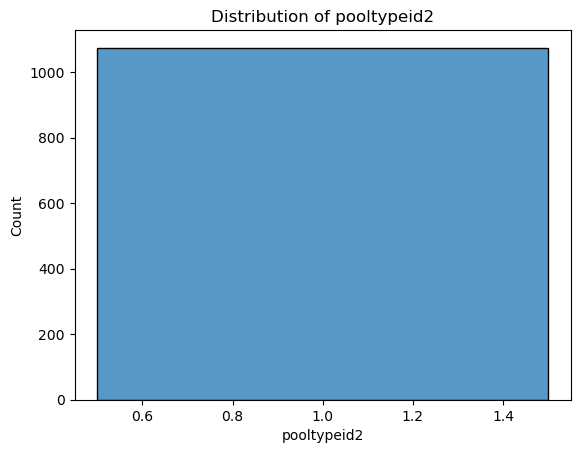

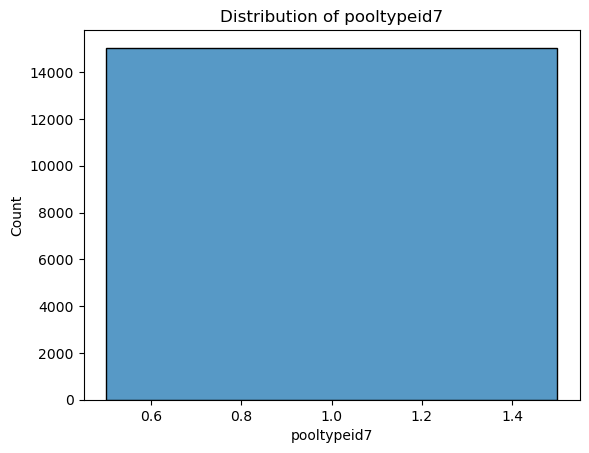

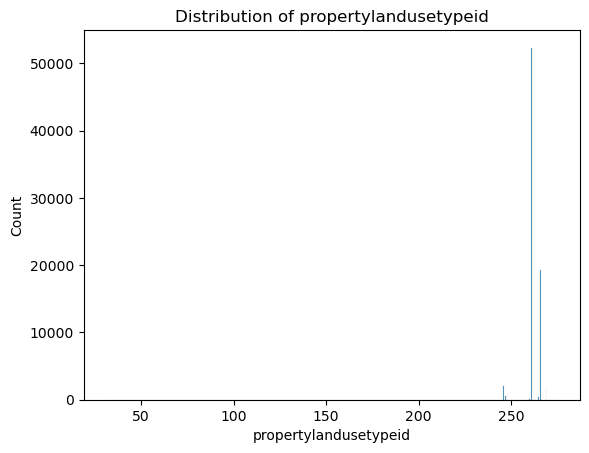

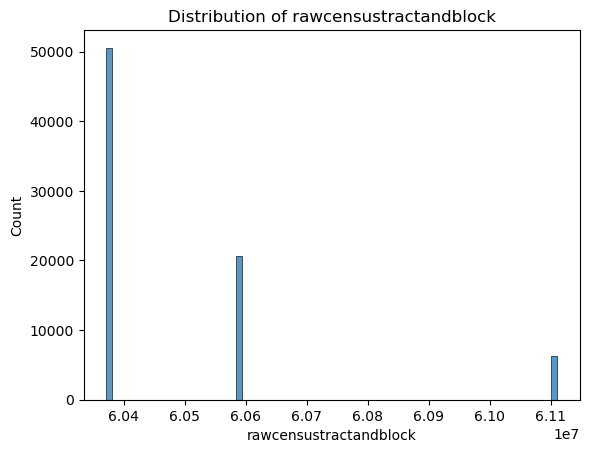

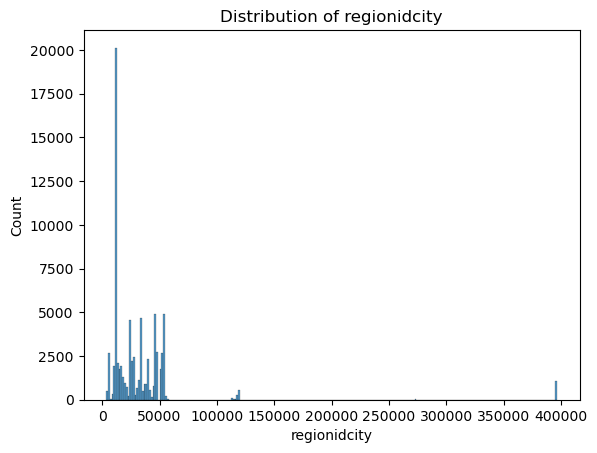

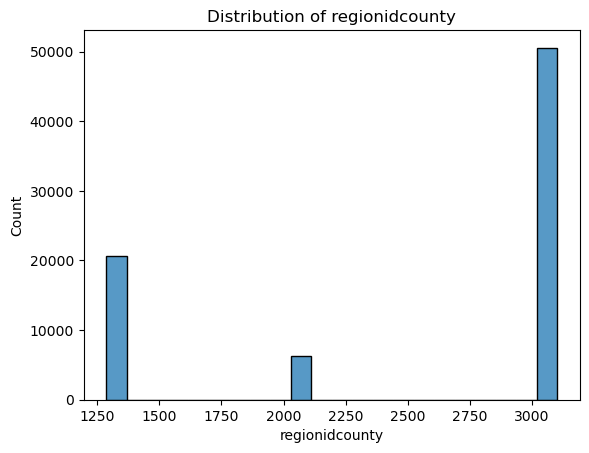

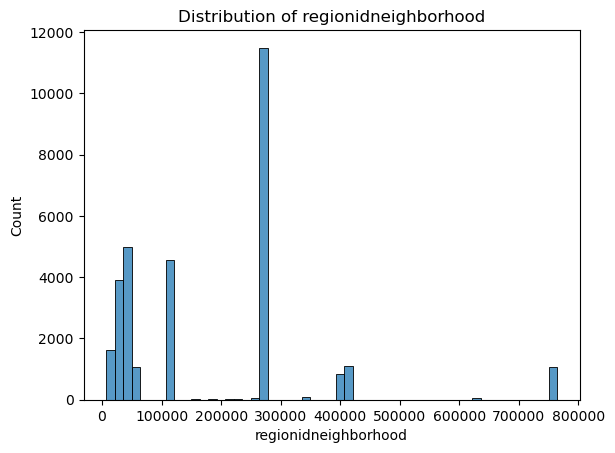

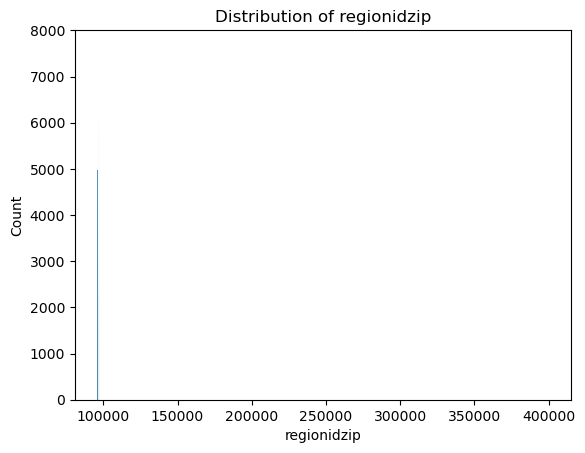

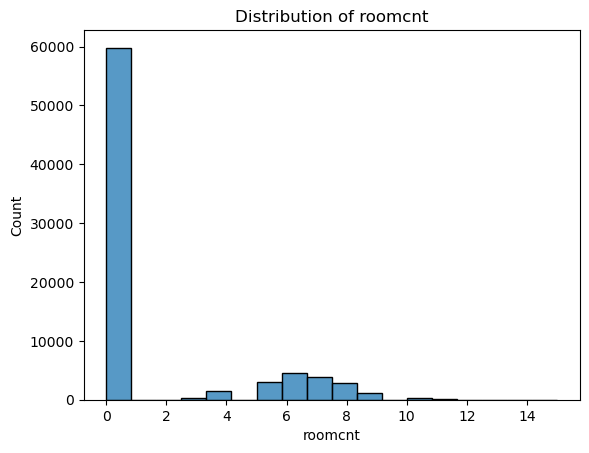

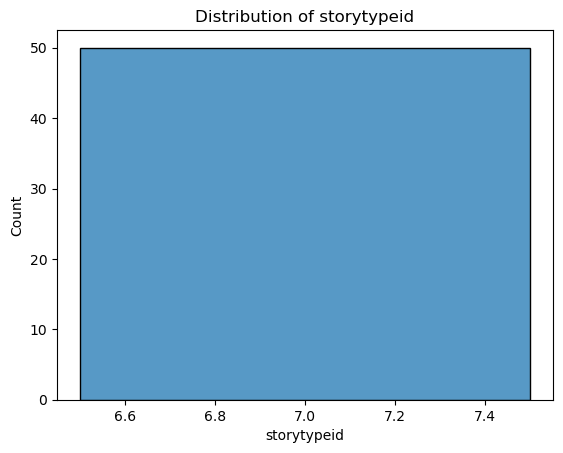

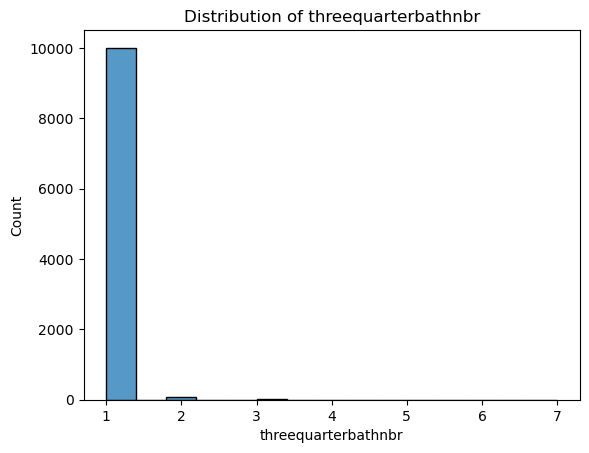

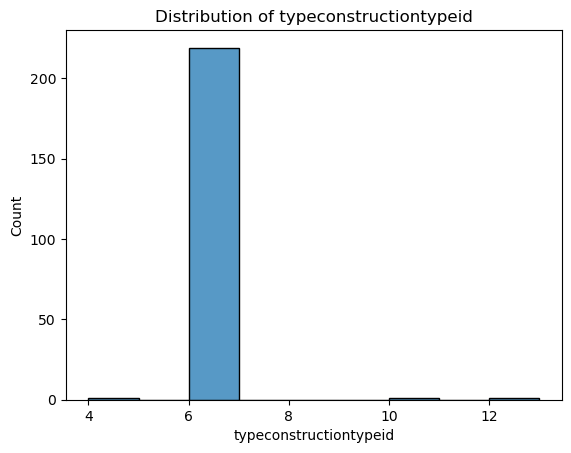

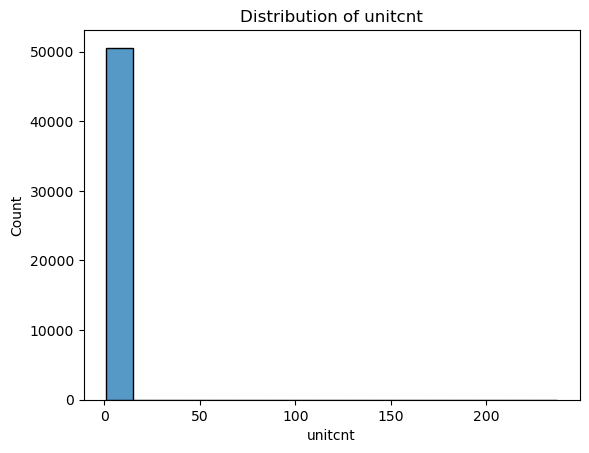

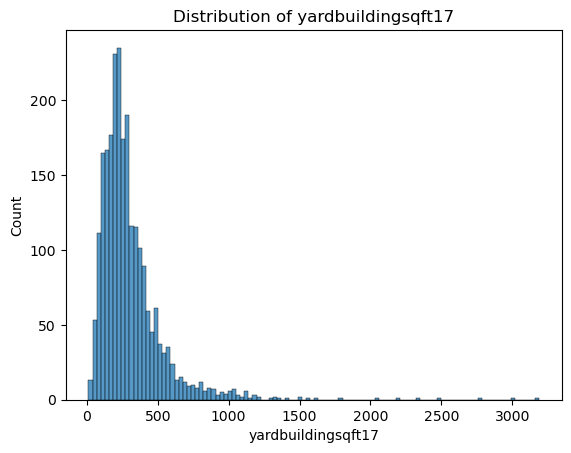

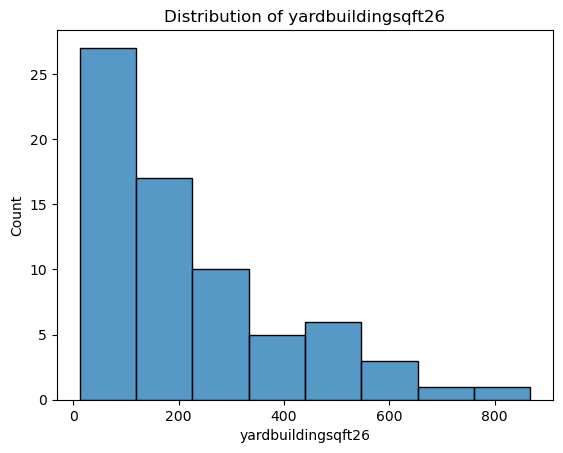

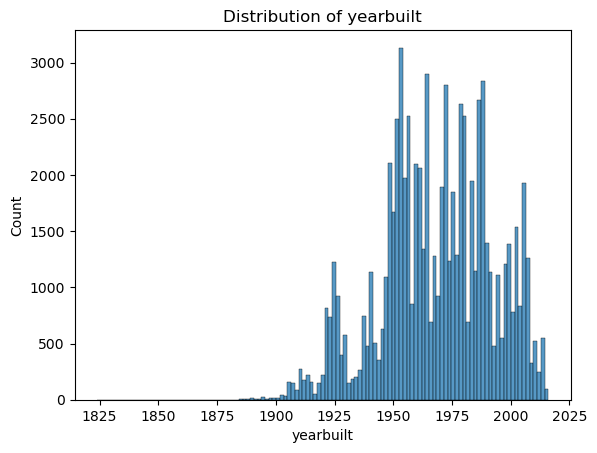

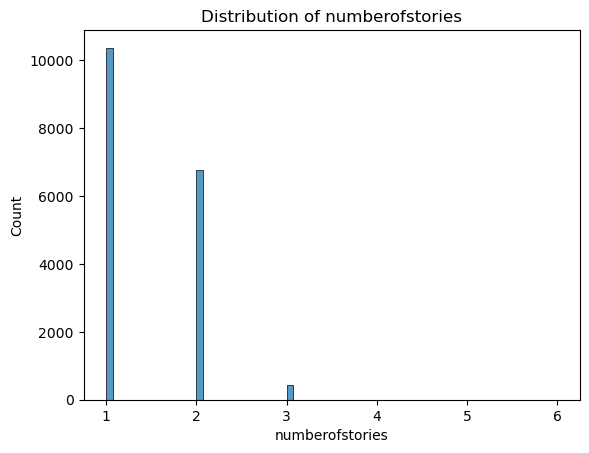

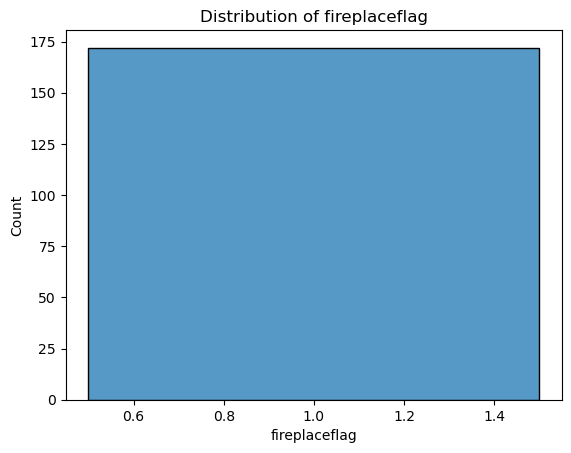

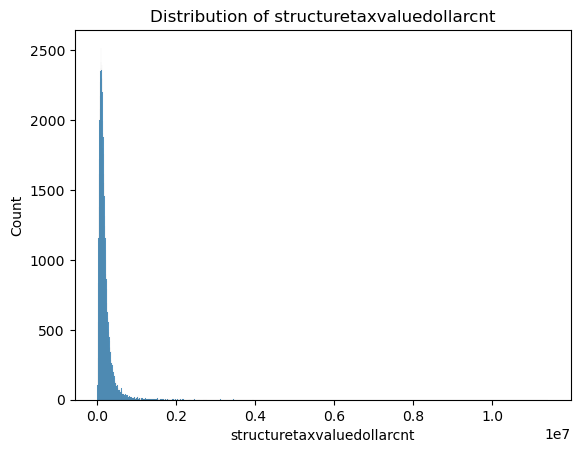

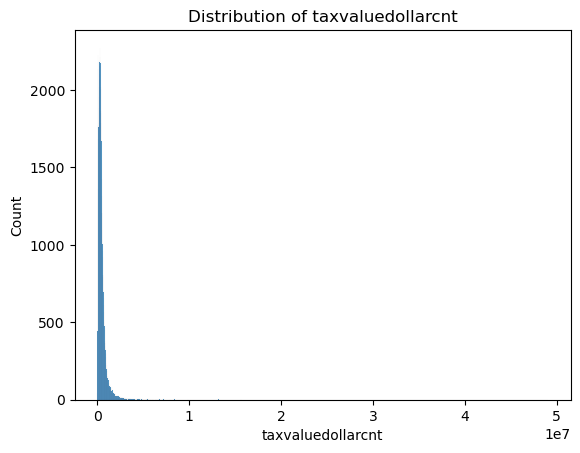

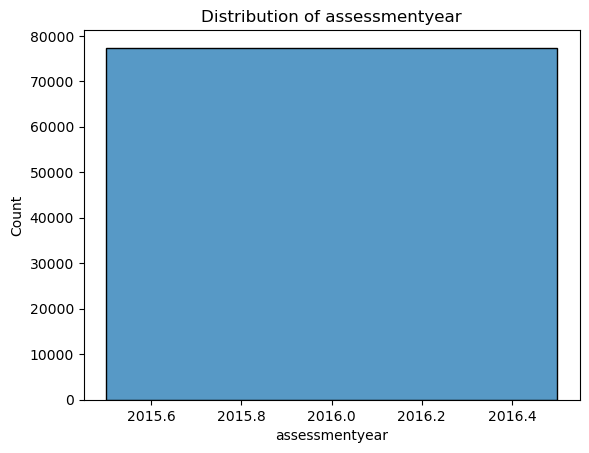

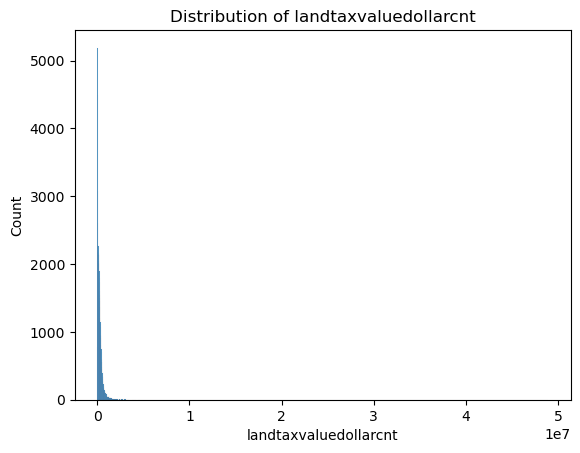

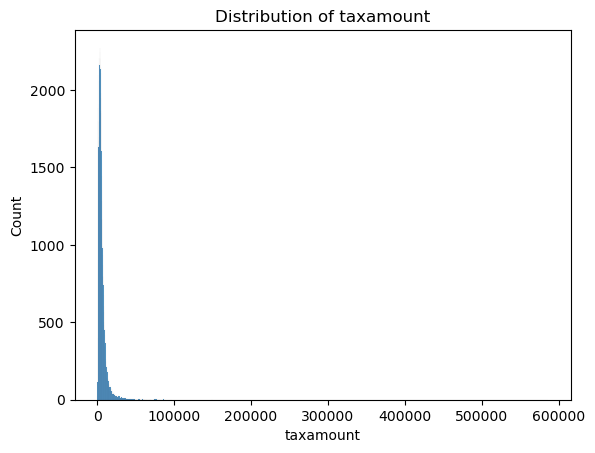

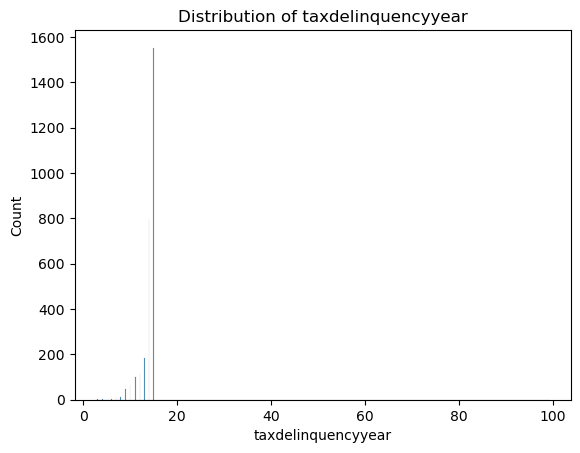

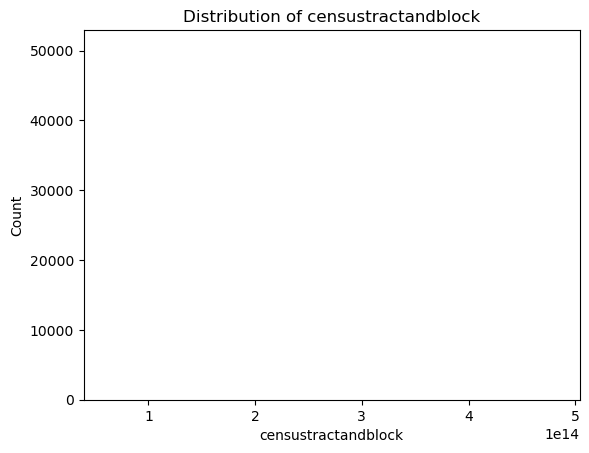

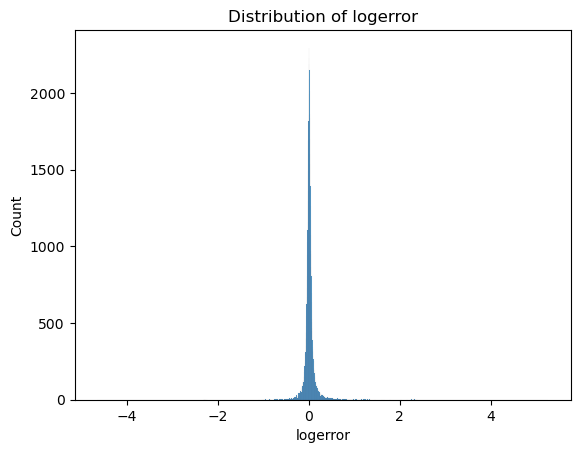

In [18]:
for col in df.columns[df.dtypes == 'float64']:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=df, x=col)
    plt.show()

In [19]:
df.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [20]:
df.transactiondate.value_counts()

2017-06-30    1189
2017-04-28     911
2017-05-31     867
2017-07-28     814
2017-08-31     781
              ... 
2017-02-18       1
2017-09-25       1
2017-07-22       1
2017-04-15       1
2017-06-03       1
Name: transactiondate, Length: 265, dtype: int64

In [21]:
df.unitcnt.value_counts()

  1.00    47293
  2.00     2018
  4.00      723
  3.00      525
 42.00        1
  6.00        1
 45.00        1
237.00        1
Name: unitcnt, dtype: int64

3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

    The output should look like the table below:

    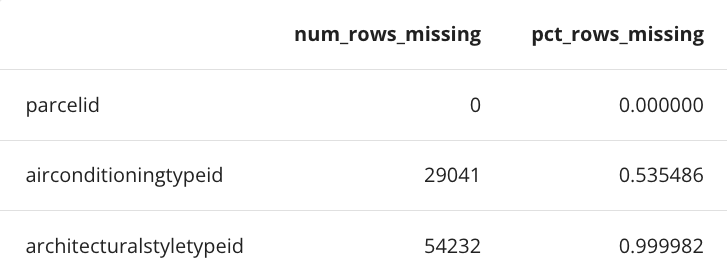

In [22]:
missing_counts = df.isna().sum()

total_rows = len(df)
missing_percentages = (missing_counts /total_rows) * 100

summary_df = pd.DataFrame({'Missing Values' : missing_counts, 'Percentage Missing (%)' : missing_percentages})

In [23]:
missing_counts

id                              0
parcelid                        0
airconditioningtypeid       52428
architecturalstyletypeid    77175
basementsqft                77331
                            ...  
taxdelinquencyflag          74495
taxdelinquencyyear          74495
censustractandblock           244
logerror                        0
transactiondate                 0
Length: 61, dtype: int64

In [24]:
total_rows

77381

In [25]:
missing_percentages

id                                         0.00
parcelid                                   0.00
airconditioningtypeid                     67.75
architecturalstyletypeid                  99.73
basementsqft                              99.94
                                   ...         
taxdelinquencyflag                        96.27
taxdelinquencyyear                        96.27
censustractandblock                        0.32
logerror                                   0.00
transactiondate                            0.00
Length: 61, dtype: float64

In [26]:
summary_df

,Missing Values,Percentage Missing (%)
id,0,0.00
parcelid,0,0.00
airconditioningtypeid,52428,67.75
architecturalstyletypeid,77175,99.73
basementsqft,77331,99.94
...,...,...
taxdelinquencyflag,74495,96.27
taxdelinquencyyear,74495,96.27
censustractandblock,244,0.32
logerror,0,0.00


In [27]:
summary_df = wrangle.missing_values(df)

In [28]:
print(summary_df)

None


--------------------------------------------------------------------------------------------------------------------

## Prepare

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

* The input:
    * A dataframe
    * A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    * A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
* The output:
    * The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
* hint:
    * Look up the dropna documentation.
    * You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.

3. Encapsulate your work inside of functions in a wrangle_zillow.py module.

----------------------------------------------------------------------------------------------------------------------------------------------

## Mall Customers

### Notebook

1. Acquire data from the customers table in the mall_customers database.  
2. Summarize the data (include distributions and descriptive statistics).  
3. Detect outliers using IQR.  
4. Split data into train, validate, and test.  
5. Encode categorical columns using a one hot encoder (pd.get_dummies).  
6. Handles missing values.  
7. Scaling  

###  **Encapsulate your work in a wrangle_mall.py python module.**